In [ ]:
#default_exp experiments_2

# Experiments

> refactor modelling, experiment functionality

In [ ]:
#export
from torchtools.core import *
from torchtools.data import *
from torchtools.models import *
from torchtools.datasets import *
from torchtools.augmentations import *
from torchtools.datablock import *
from torchtools.dataloader import *
from torchtools.experiments import *

In [ ]:
#export
import pandas as pd
import numpy as np
from fastai2.basics import *

### Worklflow with Discrete Variables

In [ ]:
data_params['ds_full_path']

Path('data/custom/bi_sample_anon.csv')

In [ ]:
df_main = pd.read_csv(data_params['ds_full_path'])

In [ ]:
data_params['splits'] = L(L(range(8000)), L(range(8000,9000)), L(range(9000,10000)))
data_params['splits'] = L(L(range(120000)), L(range(120000,160000)), L(range(160000,200000)))

In [ ]:
data_params['splits']

(#3) [(#120000) [0,1,2,3,4,5,6,7,8,9...],(#40000) [120000,120001,120002,120003,120004,120005,120006,120007,120008,120009...],(#40000) [160000,160001,160002,160003,160004,160005,160006,160007,160008,160009...]]

In [ ]:
# data_params['splits'] =  L(L(range(8000)), L(range(8000,9000)))

In [ ]:
train_params['aug']='augmix'
train_params['verbose']=False

In [ ]:
train_params['bs'] = 256

In [ ]:
ts_experiments = TSExperiments(train_params)

In [ ]:
train_params

{'arch': torchtools.models.InceptionTimeD,
 'n_epochs': 5,
 'max_lr': 1e-05,
 'wd': 0.03,
 'loss_fn_name': 'leaky_loss',
 'alpha': 0.5,
 'metrics': [<function torchtools.core.unweighted_profit(preds, y_true, threshold=0)>],
 'N': 3,
 'magnitude': 0.4,
 'bs': 256,
 'seed': 1234,
 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200',
 'pct_start': 0.3,
 'div_factor': 25.0,
 'aug': 'augmix',
 'verbose': False}

In [ ]:
ts_experiments.setup_data(df_main, data_params)

(218000, 4, 10) (218000, 2, 10)
<class 'torchtools.experiments.TSDatasets3'>
3
torch.Size([120000, 4, 10]) torch.Size([120000]) torch.Size([120000, 2, 10])
torch.Size([40000, 4, 10]) torch.Size([40000]) torch.Size([40000, 2, 10])
torch.Size([40000, 4, 10]) torch.Size([40000]) torch.Size([40000, 2, 10])


In [ ]:
ts_experiments.bs

256

In [ ]:
train_params.keys()

dict_keys(['arch', 'n_epochs', 'max_lr', 'wd', 'loss_fn_name', 'alpha', 'metrics', 'N', 'magnitude', 'bs', 'seed', 'ds_name', 'pct_start', 'div_factor', 'aug', 'verbose'])

In [ ]:
hypers = {'n_epochs': [10,15,20], 'max_lr':[1e-5, 3e-5, 1e-4]}

In [ ]:
df_fn_test = 'results2.csv'

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 10, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.129982,-0.171816,-0.073678,01:19
1,-0.228820,-0.228684,-0.088107,01:12
2,-0.563433,-0.331757,-0.153952,01:11
3,-0.341379,-0.377203,0.001698,01:16
4,-0.686230,-0.406828,-0.055707,01:14
5,-0.499508,-0.378747,-0.050518,01:11
6,-0.929041,-0.370899,-0.128441,01:12
7,-0.966129,-0.343666,-0.315030,01:14
8,-1.225736,-0.346871,-0.350439,01:14
9,-0.468775,-0.344666,-0.317398,01:13


{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 10, 'max_lr': 3e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.171699,-0.219616,-0.070309,01:14
1,-0.332747,-0.337212,-0.000715,01:13
2,-0.932726,-0.451947,0.023273,01:12
3,-0.595160,-0.387192,-0.133290,01:16
4,-1.294591,-0.409022,-0.199929,01:12
5,-1.425271,-0.170006,-0.452684,01:17
6,-1.992625,-0.279121,-0.237558,01:24
7,-2.967638,-0.198646,-0.482544,01:15
8,-2.642813,-0.234307,-0.363605,01:19
9,-2.443065,-0.232448,-0.304656,01:15


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 10, 'max_lr': 0.0001, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.292206,-0.349211,-0.050125,01:11
1,-0.498196,-0.434592,0.009810,01:10
2,-1.507009,-0.668411,0.155306,01:12
3,-0.731938,-0.298901,-0.258127,04:16
4,-1.445077,-0.316143,-0.225498,01:10
5,-1.466617,-0.201147,-0.296664,01:15
6,-2.750662,-0.414520,-0.076341,01:13
7,-3.863147,-0.179667,-0.263318,01:09
8,-4.464467,-0.295586,-0.244028,01:11
9,-4.005318,-0.284503,-0.190753,01:12


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 15, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.120524,-0.158983,-0.079627,01:09
1,-0.202450,-0.196506,-0.034499,01:15
2,-0.460663,-0.273414,-0.073964,01:11
3,-0.282637,-0.332314,-0.050544,01:13
4,-0.587301,-0.388076,0.051535,01:13
5,-0.427324,-0.366813,-0.085187,01:19
6,-0.874691,-0.353657,-0.220423,01:18
7,-1.043682,-0.296776,-0.293202,01:11
8,-1.324389,-0.301585,-0.398621,01:09
9,-0.620089,-0.268156,-0.362392,01:13


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 15, 'max_lr': 3e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.149525,-0.190700,-0.053900,01:13
1,-0.271545,-0.281175,-0.051611,01:17
2,-0.720841,-0.398316,-0.050252,01:20
3,-0.461739,-0.400238,-0.165347,01:16
4,-1.112365,-0.444996,-0.002927,01:16
5,-1.053895,-0.200183,-0.376938,01:18
6,-1.732229,-0.471019,-0.117679,01:21
7,-2.699598,-0.315910,-0.292081,01:17
8,-2.784620,-0.305673,-0.174340,01:17
9,-2.989524,-0.261487,-0.290274,01:17


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 15, 'max_lr': 0.0001, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.240487,-0.290186,-0.026590,01:15
1,-0.422931,-0.408977,0.032499,01:15
2,-1.211756,-0.567156,-0.003035,01:17
3,-0.666387,-0.589782,0.073405,01:18
4,-1.148147,-0.529365,-0.104030,01:17
5,-1.132510,-0.202712,-0.215035,01:17
6,-2.067400,-0.323068,-0.374537,01:22
7,-2.802437,-0.048367,-0.341348,01:18
8,-3.780594,-0.263633,-0.309040,01:16
9,-4.328601,-0.222017,-0.158147,01:18


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 20, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.117049,-0.154596,-0.028497,01:11
1,-0.190278,-0.177975,0.013909,01:10
2,-0.401066,-0.230104,-0.077487,01:12
3,-0.238720,-0.297996,-0.072630,01:12
4,-0.465161,-0.358165,0.004331,01:11
5,-0.324612,-0.360907,-0.099848,01:13
6,-0.795274,-0.362560,-0.245729,01:13
7,-0.919712,-0.312593,-0.233718,01:13
8,-1.254154,-0.330936,-0.324988,01:13
9,-0.571761,-0.252047,-0.301225,01:13


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 20, 'max_lr': 3e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.141239,-0.179956,-0.067498,01:13
1,-0.241680,-0.239593,-0.062938,01:11
2,-0.610190,-0.360363,-0.068968,01:13
3,-0.396800,-0.417750,-0.159327,01:11
4,-0.910908,-0.456404,-0.069532,01:14
5,-0.819945,-0.280759,-0.356726,01:13
6,-1.503227,-0.431934,-0.089964,01:13
7,-2.274886,-0.354242,-0.190405,01:13
8,-2.597991,-0.343247,-0.241064,01:15
9,-2.624536,-0.323511,-0.233886,01:14


not new
{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 20, 'max_lr': 0.0001, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fc010ff4d40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': False}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fc010ff4830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.215433,-0.260030,-0.060035,01:15
1,-0.381088,-0.367645,0.026921,01:11
2,-1.046350,-0.480944,-0.018285,01:13
3,-0.651937,-0.505268,-0.017009,01:14
4,-1.074250,-0.473650,-0.170962,01:22
5,-1.402024,-0.316809,-0.258210,03:01
6,-1.873819,-0.566712,-0.094848,01:28


In [ ]:
ts_experiments.learn.dls.after_batch.tfms

[YWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeNormal: (TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomin: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandTi

In [ ]:
xc,xd,yb = ts_experiments.learn.dls.one_batch()

weights [0.19249035 0.22298341 0.58452624], m 0.23224278480041766
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
yscale
crop
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
weights [0.1724217  0.20476278 0.62281552], m 0.9112778892979606
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
cutout
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YSc

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 2, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fe0f95badd0>], 'N': 3, 'magnitude': 0.4, 'bs': 128, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fe0f95ba8c0>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.095084,-0.000864,1.353308,00:06
1,-0.169261,0.016647,1.220281,00:06


weights [0.12069069 0.55244944 0.32685987], m 0.4964742723937071
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
yscale
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
weights [0.09596037 0.3006876  0.60335203], m 0.9468840301872898
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
dimout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTen

ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.36183297 0.11189329 0.52627374], m 0.28000372091087505
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
maskout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
zoomin
weights [0.54311766 0.19290497 0.26397737], m 0.19061532457255295
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
zoomin
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
rand

weights [0.14219935 0.28489953 0.57290113], m 0.44482877974484847
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ywarp
timewarp
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.05411261 0.39699056 0.54889683], m 0.5970595951460437
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
cutout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.7222203  0.25429657 0.02348313], m 0.13117

weights [0.53856419 0.42008207 0.04135373], m 0.8837306366479485
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timewarp
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
crop
ops in step 2 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
weights [0.292744   0.68414425 0.02311175], m 0.6111799990106732
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ynormal
weights [0.13615377 0.73312451 0.13072172], m 0.60697716

weights [0.05498763 0.8929844  0.05202797], m 0.2892986887372791
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
dimout
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
weights [0.43481255 0.42064778 0.14453967], m 0.8399734481702399
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.4023701  0.22462517 0.37300474], m 0.18097081861684775
ops in step 0 [TimeWarp: (TSIntTensor,object) ->

ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
dimout
timewarp
weights [0.33288446 0.57351073 0.0936048 ], m 0.37166436931122276
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
maskout
randtimestep
timenormal torch.Size([128, 2, 10])
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
dimout
weights [0.0808892  0.10670357 0.812

weights [0.833598   0.14441798 0.02198402], m 0.10949426690480167
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ywarp
weights [0.48463814 0.39655137 0.11881049], m 0.8745266593524675
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
weights [0.21650948 0.01783831 0.76565221], m 0.07393646282460048
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (T

ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
weights [0.03875483 0.07180667 0.8894385 ], m 0.4585558247122264
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
yscale
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
cutout
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
weights [0.16147287 0.43529661 0.40323052], m 0.5392888955040529
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encode

weights [0.38782915 0.44196385 0.170207  ], m 0.5703429898578228
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
timewarp
randomcrop
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
timestepzero
zoomout
weights [0.28156206 0.37918538 0.33925256], m 0.7847754588949705
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
yscale
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,o

weights [0.52376694 0.14937016 0.3268629 ], m 0.22960201364383345
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
randzoom
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
randomcrop
weights [0.25353343 0.56229304 0.18417353], m 0.2509990363227259
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynorma

weights [0.42106119 0.17272874 0.40621007], m 0.14583353106407512
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ynormal
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
weights [0.40483518 0.05063975 0.54452507], m 0.7852789135836744
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> 

weights [0.23454392 0.18503727 0.58041881], m 0.12864340838580923
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
randzoom
ynormal
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
randzoom
weights [0.38221736 0.34027273 0.27750991], m 0.4144329713997862
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
cutout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TST

weights [0.10444148 0.75591782 0.1396407 ], m 0.46649219915624374
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
maskout
zoomout
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
randzoom
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
dimout
randomcrop
weights [0.62949586 0.3075981  0.06290604], m 0.7793084502910711
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
dimout
ops in step 1 [Zoom

weights [0.04171741 0.05979662 0.89848597], m 0.8774144633533665
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ynormal
ywarp
weights [0.0266405  0.17664651 0.79671299], m 0.43368474018891734
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
crop
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> en

weights [0.88726721 0.09142985 0.02130294], m 0.7628493978982696
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ywarp
randomcrop
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.23764613 0.4627811  0.29957277], m 0.371381675907249
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
zoomout
timenormal torch.Size([128, 2, 10])
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.35124496 0.46140027 0.18735476], m 0.47359177902

weights [0.40860271 0.23747431 0.35392297], m 0.2220175497976628
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
timenormal torch.Size([128, 4, 10])
zoomin
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
dimout
randtimestep
weights [0.33150604 0.44081341 0.22768055], m 0.3558506231773939
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]

weights [0.16784114 0.40118121 0.43097765], m 0.10441148757315581
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
crop
ynormal
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
weights [0.0715563  0.27648085 0.65196285], m 0.6285719200594324
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encod

not new


In [ ]:
xbs = ts_experiments.dls.after_batch[0](xb)

In [ ]:
p = ts_experiments.dls.after_batch

In [ ]:
Pipeline??

In [ ]:
compose_tfms(xb, p, split_idx=0)

weights [0.07832728 0.57126234 0.35041038], m 0.03859473643731344
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
yscale
timewarp
timenormal torch.Size([128, 4, 10])
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])


TSTensor([[[-0.0072,  0.0366,  0.0059,  ...,  0.0804,  0.0284,  0.0023],
         [-0.0338,  0.1043,  0.1340,  ...,  0.0086,  0.0221,  0.0226],
         [ 0.0247,  0.0898,  0.0891,  ...,  0.0290, -0.0932,  0.0233],
         [ 0.0205, -0.0366,  0.0350,  ...,  0.0738,  0.0173,  0.0175]],

        [[ 0.0050,  0.0460,  0.0304,  ...,  0.0684,  0.0551, -0.0158],
         [-0.0257,  0.1073,  0.1560,  ...,  0.0086,  0.0218,  0.0224],
         [ 0.0484,  0.1165,  0.0962,  ...,  0.0359, -0.0837,  0.0050],
         [ 0.0579, -0.0103,  0.0170,  ...,  0.0744,  0.0170,  0.0173]],

        [[ 0.0029,  0.0246,  0.0254,  ...,  0.0557,  0.0748,  0.0023],
         [-0.0077,  0.1022,  0.1411,  ..., -0.0052,  0.0234,  0.0226],
         [ 0.0484,  0.1154,  0.1139,  ...,  0.0199, -0.0690,  0.0233],
         [ 0.0579, -0.0148,  0.0457,  ...,  0.0749,  0.0172,  0.0175]],

        ...,

        [[-0.0008,  0.0458,  0.0304,  ...,  0.0684,  0.0551, -0.0158],
         [-0.0451,  0.1077,  0.1559,  ...,  0.0086,  0.

In [ ]:
ts_experiments.dls.after_batch[1](xbs)

weights [0.32536308 0.04528067 0.62935625], m 0.5590176479614829
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
ynormal
timenormal torch.Size([128, 4, 10])
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
yscale
ynormal


TSTensor([[[-0.0437, -0.0329,  0.0056,  ...,  0.0345,  0.0015,  0.0726],
         [ 0.0055,  0.0702, -0.0085,  ...,  0.0191, -0.0207, -0.0069],
         [ 0.0177,  0.0196,  0.0302,  ...,  0.0214, -0.0053, -0.0070],
         [ 0.0546, -0.0541,  0.0097,  ...,  0.0021,  0.0398, -0.0182]],

        [[-0.0312, -0.0214,  0.0278,  ...,  0.0242,  0.0282,  0.0540],
         [ 0.0137,  0.0724,  0.0101,  ...,  0.0189, -0.0209, -0.0070],
         [ 0.0420,  0.0469,  0.0389,  ...,  0.0283,  0.0042, -0.0257],
         [ 0.0928, -0.0290, -0.0166,  ...,  0.0062,  0.0389, -0.0184]],

        [[-0.0334, -0.0415,  0.0272,  ...,  0.0120,  0.0455,  0.0726],
         [ 0.0322,  0.0701,  0.0017,  ...,  0.0039, -0.0204, -0.0069],
         [ 0.0420,  0.0459,  0.0560,  ...,  0.0169,  0.0185, -0.0070],
         [ 0.0928, -0.0324,  0.0209,  ...,  0.0074,  0.0388, -0.0182]],

        ...,

        [[-0.0371, -0.0214,  0.0279,  ...,  0.0242,  0.0282,  0.0540],
         [-0.0061,  0.0719,  0.0101,  ...,  0.0189, -0.

In [ ]:
ts_experiments.learn.dls.after_batch(xb[:2])

tensor([[[-9.1191e-01, -7.5193e-01, -1.6542e+00, -3.6954e+00, -4.2795e-01,
          -2.9532e+00,  1.3520e+00,  1.3520e+00, -2.0084e+00,  1.3520e+00],
         [-5.9138e-01,  1.5934e-02, -1.6336e+00, -1.3202e+00, -1.4686e+00,
          -1.2688e+00,  1.5934e-02,  1.5934e-02,  1.5934e-02,  1.5934e-02],
         [-4.1368e-01, -5.8321e-01, -5.0395e-01, -5.3617e-01, -1.7655e+00,
          -1.6634e-01, -7.5193e-01, -4.9402e-01, -7.1818e-01,  1.3520e+00],
         [-1.4363e+00, -1.5198e+00,  6.8398e-01,  1.5934e-02,  1.5934e-02,
          -1.4853e+00, -1.1878e+00,  1.5934e-02,  1.5934e-02,  1.5934e-02]],

        [[-1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03,
          -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03],
         [ 6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,
           6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03],
         [ 1.3520e+00,  1.3520e+00, -6.9005e-02, -2.3195e-01, -7.2838e-03,
          -7.2838

In [ ]:
ts_experiments.learn.dls.after_batch(xb)

TSTensor([[[ 0.0038,  0.0059, -0.0062,  ...,  0.0340, -0.0109,  0.0340],
         [ 0.0080,  0.0161, -0.0059,  ...,  0.0161,  0.0161,  0.0161],
         [ 0.0104,  0.0081,  0.0092,  ...,  0.0093,  0.0063,  0.0340],
         [-0.0033, -0.0044,  0.0251,  ...,  0.0161,  0.0161,  0.0161]],

        [[ 0.0159,  0.0159,  0.0159,  ...,  0.0159,  0.0159,  0.0159],
         [ 0.0160,  0.0160,  0.0160,  ...,  0.0160,  0.0160,  0.0160],
         [ 0.0340,  0.0340,  0.0150,  ...,  0.0158,  0.0158,  0.0158],
         [ 0.0340,  0.0161, -0.0035,  ...,  0.0160,  0.0160,  0.0160]],

        [[ 0.0138, -0.0059,  0.0097,  ..., -0.0010,  0.0340,  0.0340],
         [ 0.0340,  0.0161, -0.0059,  ..., -0.0010,  0.0161,  0.0161],
         [ 0.0340,  0.0340,  0.0340,  ..., -0.0014,  0.0340,  0.0340],
         [ 0.0340,  0.0161,  0.0340,  ...,  0.0161,  0.0161,  0.0161]],

        ...,

        [[ 0.0102,  0.0159,  0.0159,  ...,  0.0159,  0.0159,  0.0159],
         [-0.0033,  0.0160,  0.0160,  ...,  0.0160,  0.

In [ ]:
ts_experiments.dls.after_batch

Pipeline: TSStandardize -> RandAugment

In [ ]:
ts_experiments.dls.after_batch[1].tfms[7].verbose

True

In [ ]:
ts_experiments.dls.after_batch[1].tfms[7]

TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes 

In [ ]:
all_noise_augs??

In [ ]:
ts_experiments.dls.train.rng.sample(range(100),5)

[2, 49, 37, 80, 9]

In [ ]:
ts_experiments.dls.train.shuffle_fn(range(10))

[1, 8, 5, 2, 6, 9, 3, 0, 4, 7]

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 2, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7ff63ef91d40>], 'N': 3, 'magnitude': 0.4, 'bs': [256, 512], 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
tfms None
False
functools.partial(<function leaky_loss at 0x7ff63ef91830>, alpha=0.5)


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.110476,-0.214162,-0.058354,00:02
1,-0.156671,-0.429254,0.517770,00:02


not new


In [ ]:
ts_experiments.dls.train.rng.sample(range(100),5)

[2, 49, 37, 80, 9]

In [ ]:
ts_experiments.dls.shuffle_fn(range(10))

[1, 8, 5, 2, 6, 9, 3, 0, 4, 7]

In [ ]:
# df_results=pd.read_csv(Path(ts_experiments.results_path)/df_fn_test)
df_results=pd.read_csv(Path('./experiments/results')/df_fn_test)

In [ ]:
df_results

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,bs,...,verbose,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_0_max,Timestamp,val_preds,test_preds
0,InceptionTimeD,10,0.00001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-0.468775,-0.344666,-1.225736,-0.406828,-0.317398,0.001698,2020-05-25 10:58:55.358626,val_preds_8258470356061053757.pt,test_preds_7599661021733494987.pt
1,InceptionTimeD,10,0.00003,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-2.443065,-0.232448,-2.967638,-0.451947,-0.304656,0.023273,2020-05-25 11:11:40.369998,val_preds_7212911350011057720.pt,test_preds_8158463997974080644.pt
2,InceptionTimeD,10,0.00010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-4.005318,-0.284503,-4.464467,-0.668411,-0.190753,0.155306,2020-05-25 11:26:48.045531,val_preds_1162485800049293722.pt,test_preds_1759347721153189522.pt
3,InceptionTimeD,15,0.00001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-1.617741,-0.171388,-1.617741,-0.388076,-0.355498,0.051535,2020-05-25 11:45:11.511727,val_preds_6854343185480098171.pt,test_preds_1171854587253779204.pt
4,InceptionTimeD,15,0.00003,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-4.828954,-0.112711,-4.828954,-0.471019,-0.447221,-0.002927,2020-05-25 12:04:45.678216,val_preds_8049851552234404977.pt,test_preds_8038738384245334549.pt
5,InceptionTimeD,15,0.00010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-7.078505,-0.269823,-7.078505,-0.589782,-0.303080,0.073405,2020-05-25 12:23:52.910947,val_preds_904524054825476576.pt,test_preds_568986932495337937.pt
6,InceptionTimeD,20,0.00001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-2.381007,-0.304217,-2.381007,-0.362560,-0.274288,0.013909,2020-05-25 12:48:28.100990,val_preds_5541086522277955091.pt,test_preds_4446627815695649663.pt
7,InceptionTimeD,20,0.00003,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,256,...,False,-7.056382,-0.048541,-7.056382,-0.456404,-0.586725,-0.062938,2020-05-25 13:13:25.561786,val_preds_5499328403272941487.pt,test_preds_1982235474250378398.pt


In [ ]:
ts_experiments.learn.dls[2].dataset

(#1000) [(TSTensor([[ -26.1780,  -82.6446,  -69.4444,  100.0000,  -26.8817,  100.0000,
          100.0000,  -21.0970,  -16.5016,  100.0000],
        [-100.0000,  -57.4713,    0.0000,  100.0000,  -58.8235,  100.0000,
          100.0000,  100.0000,    0.0000,  100.0000],
        [ -24.1546,  -65.7895,  -51.5464,  100.0000,  100.0000, -106.3830,
          -60.9756,  100.0000,  100.0000, -100.0000],
        [ 100.0000,  -42.0168,  -89.2857,  100.0000,  100.0000, -106.3830,
         -106.3830,  100.0000,  100.0000, -100.0000]]), TSIntTensor([[-1,  0,  0,  4, -1,  3,  1,  0, -1,  1],
        [ 0,  0, -1,  2,  3, -1, -5,  2,  2,  0]]), tensor(100.)),(TSTensor([[-136.9863,  -49.7512,  100.0000,  -35.9712,  -32.7869,  100.0000,
          100.0000,  -19.9601,  -65.7895,  -30.6748],
        [-102.0408,   50.0000,  100.0000, -129.8701, -119.0476,  100.0000,
          100.0000, -101.0101,  -86.9565,  100.0000],
        [ 100.0000,  -41.8410,  -51.0204,  -33.2226,  100.0000,  -23.8095,
          -34

In [ ]:
ts_experiments.learn.get_preds(2)[0]

tensor([[-0.0809],
        [-0.0809],
        [-0.0606],
        [-0.9293],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.3140],
        [-0.3140],
        [-0.2579],
        [-0.6145],
        [-0.5642],
        [-0.3821],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.3123],
        [-0.0178],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.8095],
        [-0.2521],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.1889],
        [-0.1889],
        [-0.9199],
        [ 0.0420],
        [-0.

In [ ]:
pvalid = np.round(ts_experiments.learn.get_preds(1)[0].numpy(),2)

(array([  4.,  19., 107., 216., 237., 274.,  86.,  40.,  14.,   3.]),
 array([-0.73      , -0.62600005, -0.522     , -0.418     , -0.314     ,
        -0.21000001, -0.10600001, -0.002     ,  0.102     ,  0.206     ,
         0.31      ], dtype=float32),
 <a list of 10 Patch objects>)

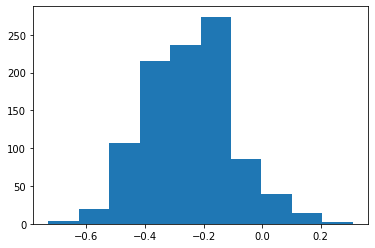

In [ ]:
plt.hist(pvalid)